Title: Breast Cancer Detection using Machine Learning

Author: Tai Nyirenda

Date: 15/12/2023

# Introduction

This report delves into the detection of breast cancer using various models that classify whether breast cancer masses are either benign or malignant. The terms benign and malignant determine whether a diagnosis of breast cancer is confirmed. Benign indicates that’s a mass is not cancerous, and malignant indicated that a mass is cancerous. The relevance of breast cancer detection extends beyond industrial applications; it is a critical need in the healthcare sector as manually detecting cancer can be a timely process. Machine learning plays a crucial role in breast cancer detection by leveraging labeled datasets of breast cancer mass characteristics to train models that can identify patterns associated with benign and malignant biopses. Relevant features, such as tumor size, shape, texture, and other characteristics, are extracted from medical images or clinical data. These features serve as input variables for a machine learning model. Various supervised learning algorithms, including logistic regression, support vector machines, decision trees, and ensemble methods like random forests, are trained on the labeled dataset. The aim of this report was to design and implement an autonomous system utilising appropriate methods, tools and models for breast cancer detection.

In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import pyplot

import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score

Importing the dataset through custom library for Wisconsin Breast Cancer Diagnosis:

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# Fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# Data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# Metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# Variable information 
print(breast_cancer_wisconsin_diagnostic.variables) 


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'published_in': 'Electronic imaging', 'year': 1993, 'url': 'https://www.semanticscholar.org/paper/53

In [3]:
# converting breast_cancer_wisconsin_diagnostic.variables DataFrame containing the variable information to list to form array for DataFrame
target_names = breast_cancer_wisconsin_diagnostic.variables.loc[ breast_cancer_wisconsin_diagnostic.variables['role'] == 'Target', 'name'].tolist()
feature_names = breast_cancer_wisconsin_diagnostic.variables.loc[ breast_cancer_wisconsin_diagnostic.variables['role'] == 'Feature', 'name'].tolist()

print("Target Names:", target_names)
print("Feature Names:", feature_names)


Target Names: ['Diagnosis']
Feature Names: ['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3']


Creating a DataFrame for the data to make it usable fromt he metadata:

In [5]:
# Getting target_names and feature_names from metadata
target_names = ['Diagnosis']
feature_names = ['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3']

# Creating a DataFrame for features
df_features = pd.DataFrame(data=breast_cancer_wisconsin_diagnostic.data.features, columns=feature_names)

# Creating DataFrame for targets
df_targets = pd.DataFrame(data=breast_cancer_wisconsin_diagnostic.data.targets, columns=target_names)

# Concatenating features and targets DataFrames along columns (axis=1)
df = pd.concat([df_features, df_targets], axis=1)

# Printing Dataframe
print(df)

     radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0      17.99     10.38      122.80  1001.0      0.11840       0.27760   
1      20.57     17.77      132.90  1326.0      0.08474       0.07864   
2      19.69     21.25      130.00  1203.0      0.10960       0.15990   
3      11.42     20.38       77.58   386.1      0.14250       0.28390   
4      20.29     14.34      135.10  1297.0      0.10030       0.13280   
..       ...       ...         ...     ...          ...           ...   
564    21.56     22.39      142.00  1479.0      0.11100       0.11590   
565    20.13     28.25      131.20  1261.0      0.09780       0.10340   
566    16.60     28.08      108.30   858.1      0.08455       0.10230   
567    20.60     29.33      140.10  1265.0      0.11780       0.27700   
568     7.76     24.54       47.92   181.0      0.05263       0.04362   

     concavity1  concave_points1  symmetry1  fractal_dimension1  ...  \
0       0.30010          0.14710     0.2419        

In [5]:
# Displaying the first 20 rows od the DataFrame
df.head(20)

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,M
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,M
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,M
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,M
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,M
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,M


In [6]:
#how many cases are included in the dataset
length = len(df)
#how many features are in the dataset
features = df.shape[1]-1

# Number of malignant cases
malignant = len(df[df['Diagnosis']=='M'])

#Number of benign cases
benign = len(df[df['Diagnosis']=='B'])

#Rate of malignant tumors over all cases
rate = (float(malignant)/(length))*100

print("There are "+ str(len(df))+" cases in this dataset")
print("There are {}".format(features)+" features in this dataset")
print("There are {}".format(malignant)+" cases diagnosed as malignant tumor")
print("There are {}".format(benign)+" cases diagnosed as benign tumor")
print("The percentage of malignant cases is: {:.4f}%".format(rate))

There are 569 cases in this dataset
There are 30 features in this dataset
There are 212 cases diagnosed as malignant tumor
There are 357 cases diagnosed as benign tumor
The percentage of malignant cases is: 37.2583%


# Exploratory Data Analysis - EDA

In [7]:
# Checking datatype for columns in DataFrame
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

With the information provided about the dataset, we are dealing with numerical categorical data.

In [8]:
# Statistical Summary of DataFrame columnms
df.describe()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Here we can see the mean values of each column to gain insight into the column distributions. This is only shown for numerical values.

In [9]:
# Checking DataFrame for any missing values
df.isnull().sum()

radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
Diagnosis             0
dtype: int64

We can see that the data set has no missingness in a any of the columns. 

# Data Modelling

Pre-processing target feature so 'M' has a value of 1 for malignant biopsies, and 'B' has a value of 0 for benign biopsies:

In [10]:
# Numerising diagnosis "M" malignant; "B" benign using a dictionary and map function
diagnosis_coder = {'M':1, 'B':0}
df.Diagnosis = df.Diagnosis.map(diagnosis_coder)

In [11]:
# Defining a diagnosis series object
diagnosis = df.Diagnosis

In [12]:
# Dropping old diagnosis  column from dataframe
df.drop('Diagnosis', axis = 1, inplace = True)

In [13]:
# Appending new numerised diagnosis column to end of dataframe
df['Diagnosis'] = diagnosis

In [14]:
# Previewing Dataframe with new changes
df.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [15]:
# Preview of tumor features (mean values) in relation to diagnosis
df.groupby('Diagnosis').mean()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
Diagnosis,,,,,,,,,,,,,,,,,,,,,
0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


# Data Visualisation

In [16]:
# creating dataframes - one for benign, one for malignant tumor data just get targets counts
df_n = df[df['Diagnosis'] == 0]
df_y = df[df['Diagnosis'] == 1]

# List of features related to mean tumor characteristics
features_means =list(df.columns[0:10])

count = df['Diagnosis'].value_counts()
count.index = ['Benign', 'Malignant']

print(count)

Benign       357
Malignant    212
Name: count, dtype: int64


C:\Users\taies\AppData\Local\Temp\ipykernel_23056\1737992938.py:4: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(df['Diagnosis'], sort = True)


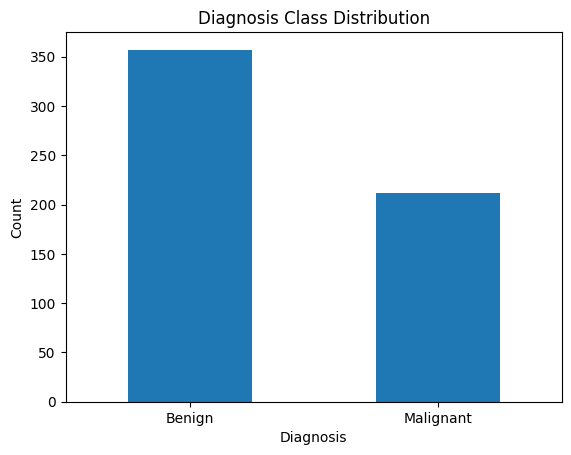

In [17]:
# Visualising the count of diagnosis using a bar plot
LABELS = ["Benign", "Malignant"]

count_classes = pd.value_counts(df['Diagnosis'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Diagnosis Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Diagnosis")
plt.ylabel("Count");

In [18]:
# Visualising the percentage of each diagnoses
colors = ['#004B87', 'LightBlue']
labels = ['Benign', 'Malignant']
values = df['Diagnosis'].value_counts() / df['Diagnosis'].shape[0]
total_normal = df[df['Diagnosis'] == False].shape[0]
total_fraudulent = df[df['Diagnosis'] == True].shape[0]

fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='black', width=0.1)))

fig.update_layout(
    title_text='<b>Diagnoses</b>',
    title_font_color='black',
    title_font=dict(size=24),
    legend_title_font_color='black',
    paper_bgcolor='white',
    plot_bgcolor='white',
    font_color='black',
)

The Wisconsin Breastcancer dataset displays a insignificant class imbalance, indicating little discrepancy in the distribution of Benign and Malignant Diagnoses.

Now, looking into the distribution in the histology of begning and malignant biopses:

C:\Users\taies\AppData\Local\Temp\ipykernel_23056\3394049675.py:3: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.

C:\Users\taies\AppData\Local\Temp\ipykernel_23056\3394049675.py:17: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\taies\AppData\Local\Temp\ipykernel_23056\3394049675.py:18: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your c

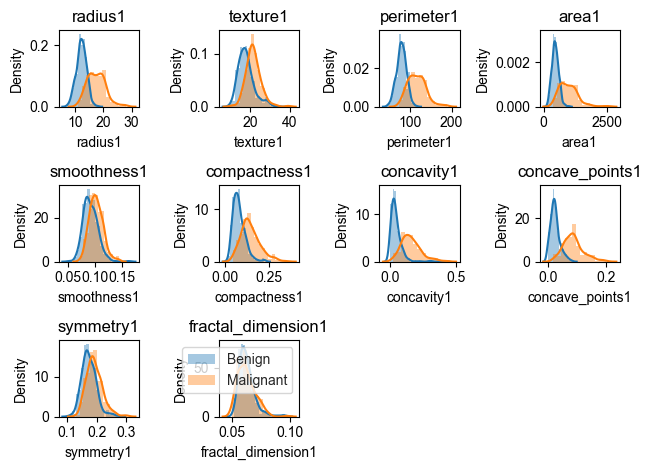

In [19]:
import seaborn as sns

count_classes = pd.value_counts(df['Diagnosis'], sort = True)

fig = plt.figure()

# Iteratation through tumor features to compare using histograms
for i,b in enumerate(list(df.columns[0:10])):
    
    # Starts at index 0, +1 for subplotting
    i +=1
    
    # Axes object for position i
    ax = fig.add_subplot(3,4,i)
    
    # Plot histogram tumor charateristics using stacked and alpha parameter comparisons
    sns.distplot(df_n[b], kde=True, label='Benign')
    sns.distplot(df_y[b], kde=True, label='Malignant')
   
    ax.set_title(b)

sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()   

Visualising the negative and positive distributions for begnign and malignant biopsies:

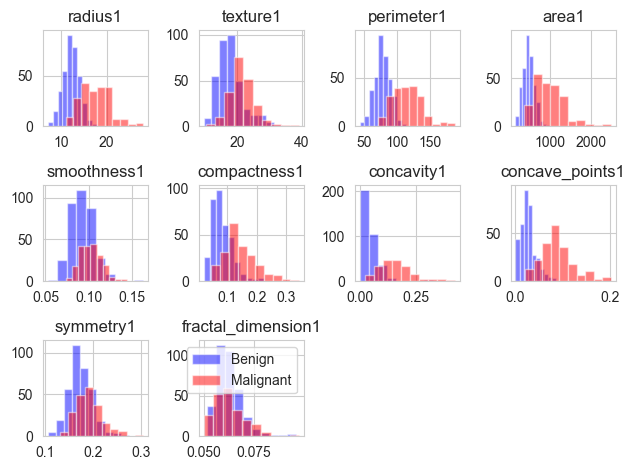

In [20]:
fig = plt.figure()

for i,b in enumerate(list(df.columns[0:10])):
    
    i +=1
    
    ax = fig.add_subplot(3,4,i)
    
    ax.hist(df_n[b], label = 'Benign', stacked = True, alpha=0.5, color= 'b')
    ax.hist(df_y[b], label= 'Malignant', stacked = True, alpha=0.5, color= 'r')
    
    ax.set_title(b)

sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show() 

Visualising the correlation using a heatmap:

<Axes: >

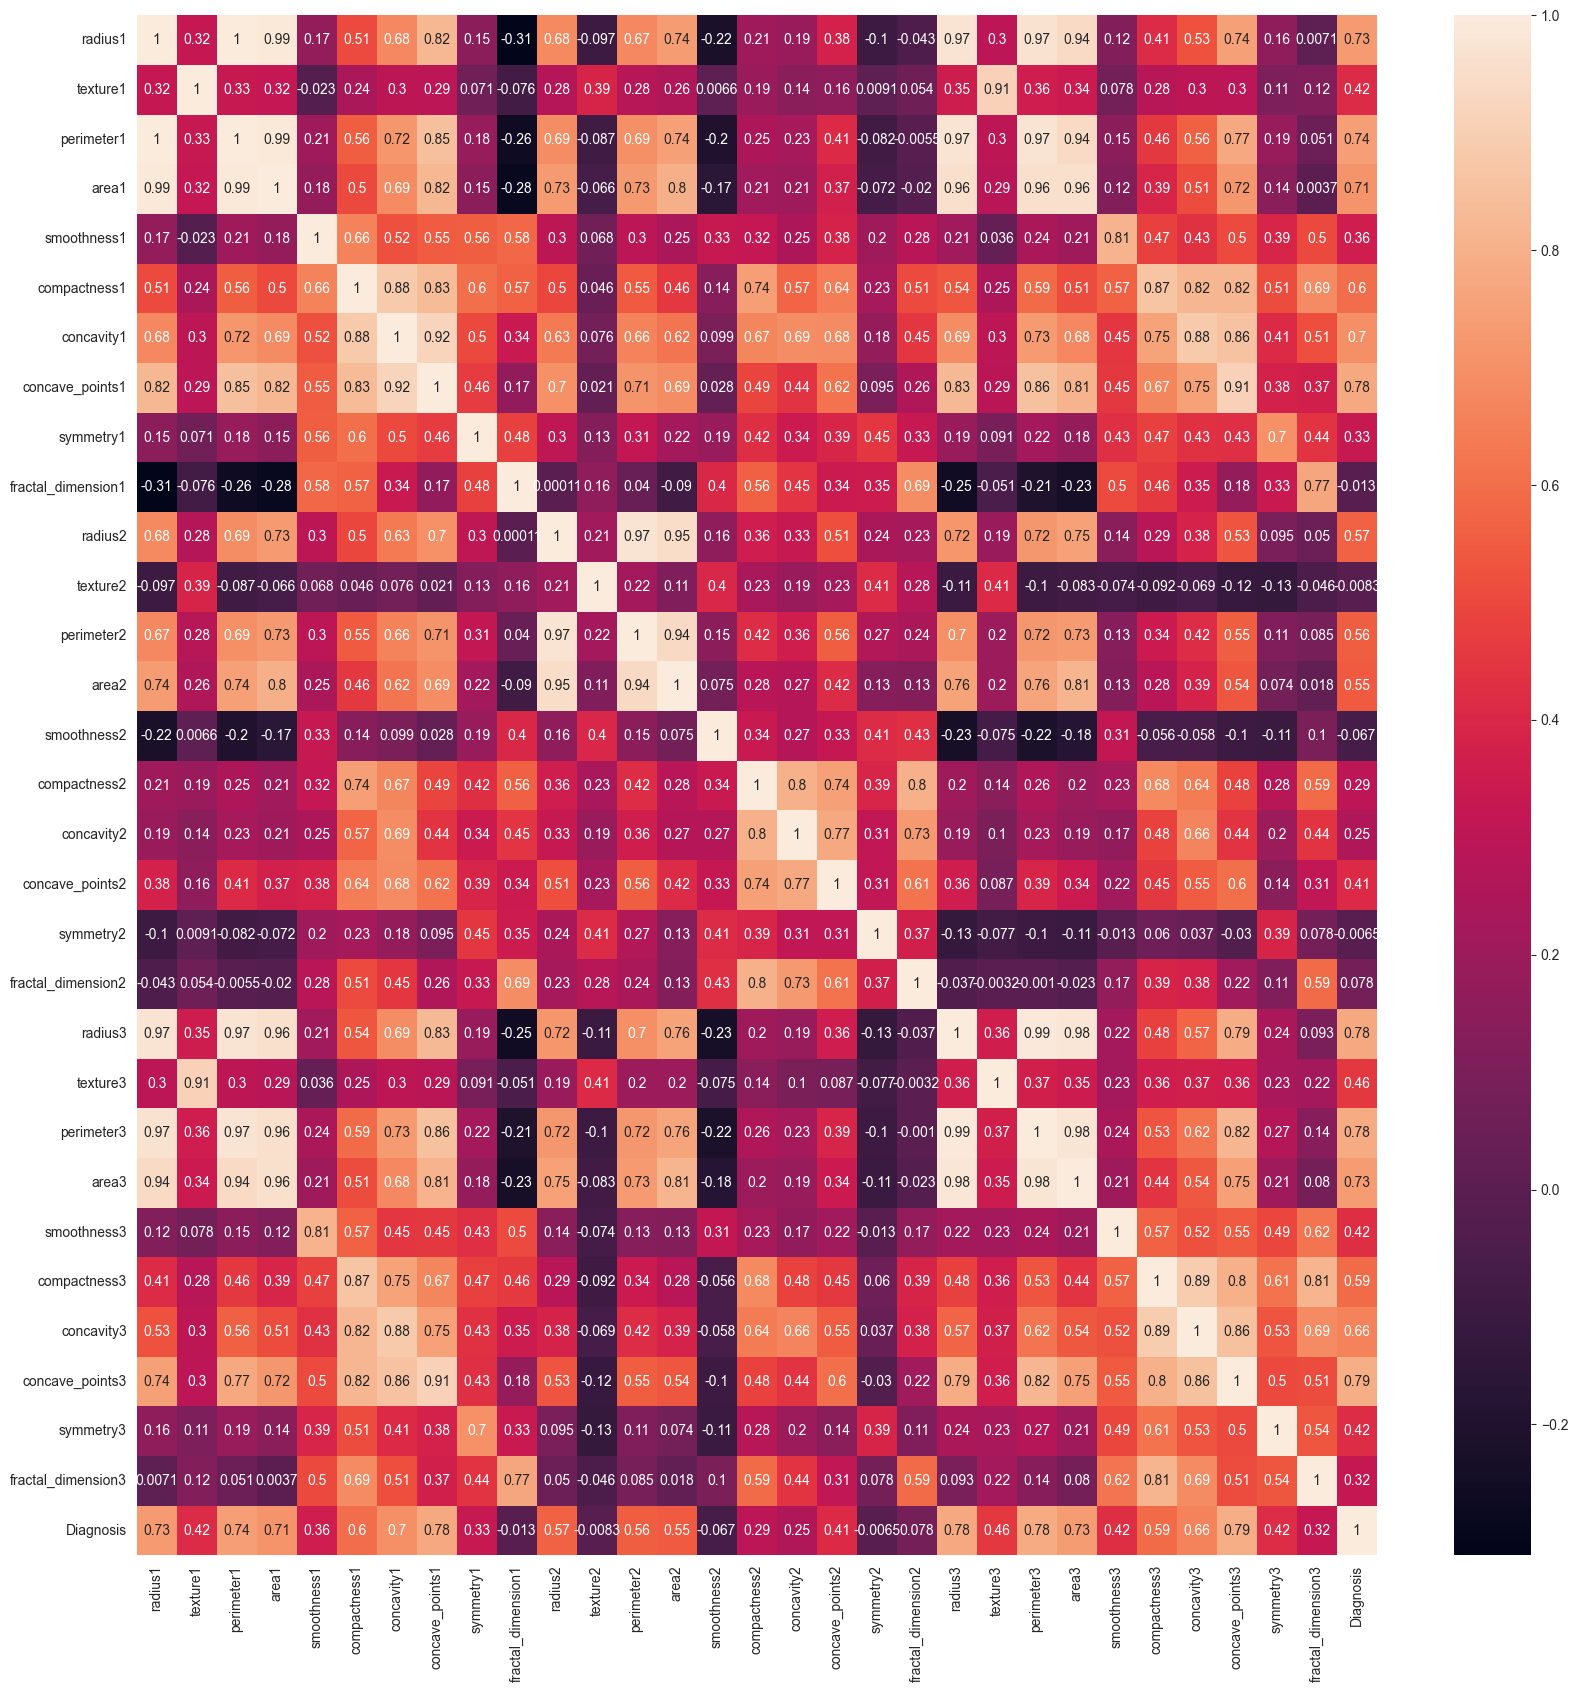

In [55]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

#  Further Data Pre-Processing

In [21]:
df.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


Train/Test split:

In [22]:
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

In [11]:
# Splitting data into testing and training set, 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df['Diagnosis'], train_size=0.8, random_state=42)

Feature Scaling:

In [13]:
# Initializing the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Models and Evaluation

## Logistic Regression

In [60]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [61]:
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.9736842105263158
Confusion Matrix:
[[70  1]
 [ 2 41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



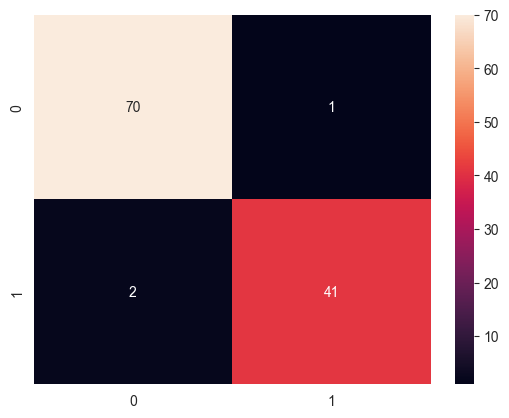

In [62]:
# Confusion Metrix
cm=confusion_matrix(y_test,y_pred)
cm
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

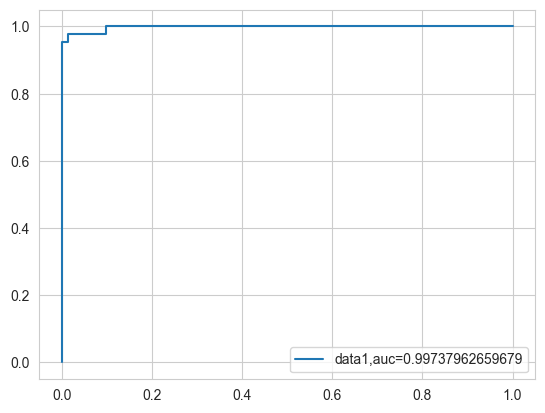

In [63]:
#auc
from sklearn import metrics
Y_pred_proba=model.predict_proba(X_test_scaled)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,Y_pred_proba)
auc=metrics.roc_auc_score(y_test,Y_pred_proba)
plt.plot(fpr,tpr,label='data1,auc='+str(auc))
plt.legend(loc=4)
plt.show()

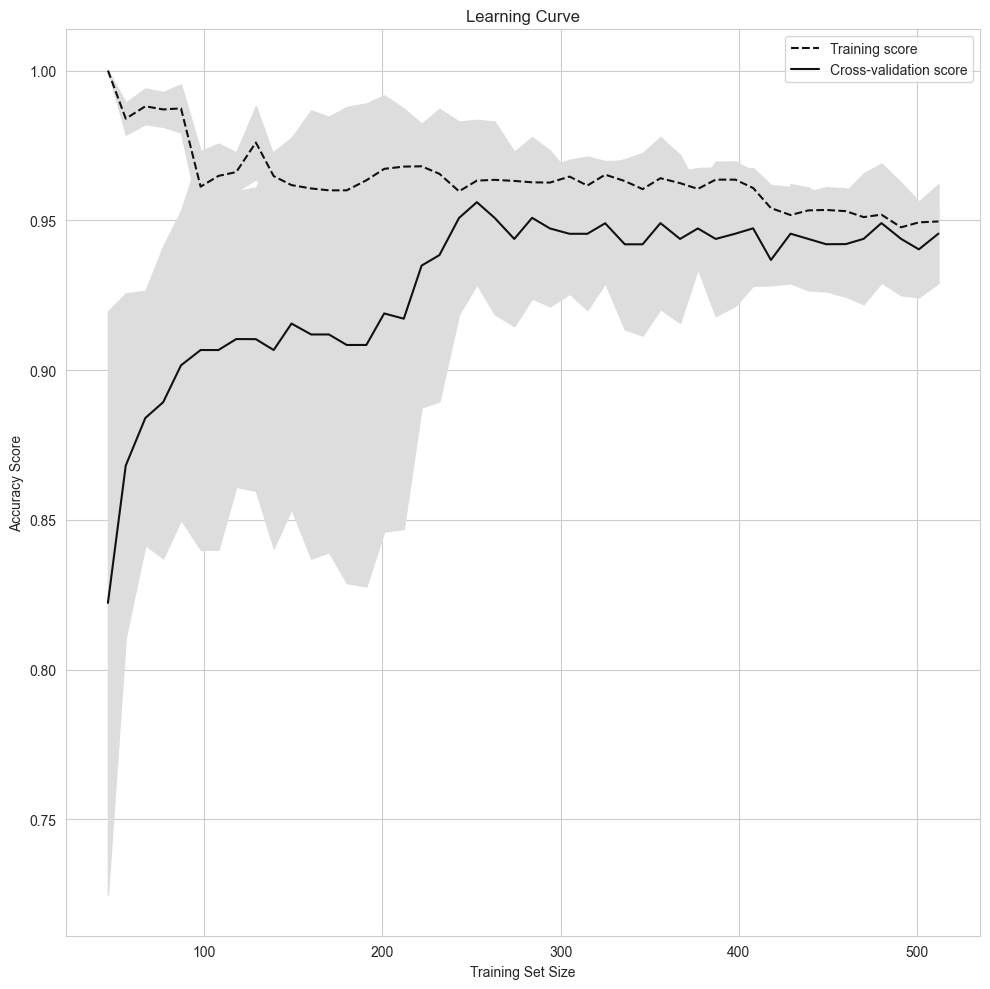

In [64]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(), X, y, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

#### Looking at the most predictive features for the Logistic Regression model:

In [68]:
# Fitting logistic regression model on scaled data
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Accessing coefficients and corresponding feature names
coefficients = model.coef_[0]
feature_names = X_train.columns

# Creating a DataFrame to organize coefficients and feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sorting DataFrame by absolute coefficient values in descending order
coefficients_df = coefficients_df.reindex(coefficients_df['Coefficient'].abs().sort_values(ascending=False).index)

# Displaying the DataFrame
print(coefficients_df)

               Feature  Coefficient
21            texture3     1.342188
10             radius2     1.271147
28           symmetry3     1.208531
7      concave_points1     1.117021
26          concavity3     0.945714
13               area2     0.909800
20             radius3     0.878610
23               area3     0.846559
6           concavity1     0.796771
27     concave_points3     0.773436
15        compactness2    -0.685972
19  fractal_dimension2    -0.613405
12          perimeter2     0.609366
22          perimeter3     0.587557
24         smoothness3     0.549945
5         compactness1    -0.542106
18           symmetry2    -0.499980
3                area1     0.464316
0              radius1     0.427896
1             texture1     0.393913
2           perimeter1     0.389550
17     concave_points2     0.317692
14         smoothness2     0.312461
8            symmetry1    -0.235713
11            texture2    -0.188640
16          concavity2    -0.180815
29  fractal_dimension3     0

In [71]:
# Taking the absolute values of coefficients
abs_coefficients = np.abs(coefficients)

# Sorting coefficients by absolute values in descending order
sorted_indices = np.argsort(abs_coefficients)[::-1]
sorted_coefficients = abs_coefficients[sorted_indices]

# Display the 5 top features
top_features = sorted_indices[:5] 
print(top_features)


[21 10 28  7 26]


## Random Forest 

In [78]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)


y_pred = clf.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.9649122807017544
Confusion Matrix:
[[70  1]
 [ 3 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



Evaluating model accuracy on the fitting of the train and test sets for each tree depth.

In [79]:
values = [i for i in range(1, 21)]

In [80]:
train_scores, test_scores = list(), list()

In [81]:
for i in values:
 model = RandomForestClassifier(max_depth=i)
 
 model.fit(X_train_scaled, y_train)
 
 train_yhat = model.predict(X_train_scaled)
 train_acc = accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)
 
 test_yhat = model.predict(X_test_scaled)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)
 
 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.923, test: 0.947
>2, train: 0.960, test: 0.965
>3, train: 0.980, test: 0.965
>4, train: 0.989, test: 0.965
>5, train: 0.993, test: 0.965
>6, train: 0.996, test: 0.965
>7, train: 1.000, test: 0.965
>8, train: 1.000, test: 0.965
>9, train: 0.998, test: 0.965
>10, train: 1.000, test: 0.965
>11, train: 1.000, test: 0.965
>12, train: 1.000, test: 0.965
>13, train: 1.000, test: 0.965
>14, train: 1.000, test: 0.965
>15, train: 1.000, test: 0.956
>16, train: 1.000, test: 0.965
>17, train: 1.000, test: 0.965
>18, train: 1.000, test: 0.965
>19, train: 1.000, test: 0.965
>20, train: 1.000, test: 0.965


Using a randomised search for the best tree depth:

In [83]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}


rf = RandomForestClassifier()


rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)


rand_search.fit(X_train_scaled, y_train)

best_rf = rand_search.best_estimator_


print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 15, 'n_estimators': 271}


Looking at the most predictive features for Random Forest model:

In [84]:
# Initializing and training the RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

# Extracting feature importances
feature_names = X.columns
importances = clf.feature_importances_

# Creating a DataFrame with feature names and importances
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sorting features by importance in descending order
sorted_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Displaying the top 5 features
top_features = sorted_importances.head(5)  # Adjust the number as needed
print(top_features)

            Feature  Importance
23            area3    0.153892
27  concave_points3    0.144663
7   concave_points1    0.106210
20          radius3    0.077987
6        concavity1    0.068001


## K-Nearest Neighbour, Gaussian Naive-Bayes:

In [76]:
models=[]

models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [77]:
results =[]
names=[]
for name , model in models:
    kfold=KFold(n_splits=10, random_state=40,shuffle=True)
    cv_results= cross_val_score(model, X_train_scaled, y_train, cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    
    msg= '%s:, %f, (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN:, 0.964734, (0.024731)
NB:, 0.922899, (0.039938)
SVM:, 0.973623, (0.021441)


## Support Vector Machine (SVM)

Making predictions using the test dataset:

In [85]:
SVM = SVC()
SVM.fit(X_train_scaled, y_train)
predictions= SVM.predict(X_test_scaled)
print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

0.9824561403508771
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

[[71  0]
 [ 2 41]]


[[71  0]
 [ 2 41]]


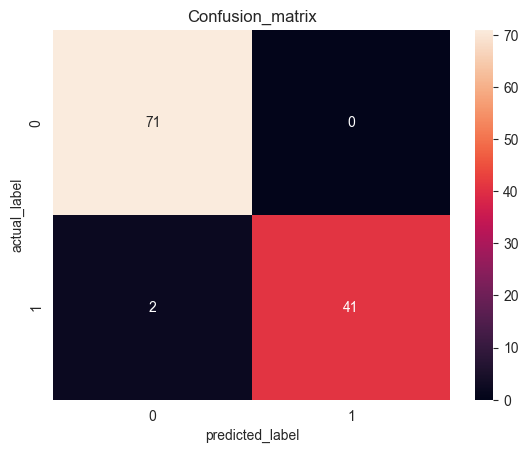

In [86]:
#pconfusion_matrix(Y_test, predictions)
cm=confusion_matrix(y_test,predictions)
print(cm)
sns.heatmap(cm,annot=True)
plt.ylabel('actual_label')
plt.xlabel('predicted_label')
plt.title('Confusion_matrix')
plt.savefig('h.png')

Looking at the most predictive features for SVM model:

In [88]:
# Initializing the SVM model with a linear kernel
SVM = SVC(kernel='linear')
SVM.fit(X_train_scaled, y_train)

# Getting coefficients from the SVM model
coefficients = SVM.coef_

# Creating a DataFrame to associate features with their corresponding coefficients
feature_importances = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients[0]})

# Sorting features by absolute coefficient values in descending order
sorted_importances = feature_importances.iloc[abs(feature_importances['Coefficient']).argsort()[::-1]]

# Display the top 5 features
top_features = sorted_importances.head(5)  # Adjust the number as needed
print(f'Top Features for SVM with Linear Kernel:\n{top_features}')

Top Features for SVM with Linear Kernel:
            Feature  Coefficient
7   concave_points1     1.416505
21         texture3     1.192843
10          radius2     1.013810
28        symmetry3     0.802394
13            area2     0.774404


## Genetic Algorithm

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import random


logmodel = LogisticRegression(max_iter=10000, solver='lbfgs')
logmodel.fit(X_train_scaled, y_train)
predictions = logmodel.predict(X_test_scaled)
print("Accuracy = " + str(accuracy_score(y_test, predictions)))

# Defining various steps required for the genetic algorithm
def initialization_of_population(size, n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat)
        chromosome[:int(0.9 * n_feat)] = 0
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

def fitness_score(population, X_train, X_test, y_train, y_test):
    scores = []
    for chromosome in population:
        if sum(chromosome) > 0:
            selected_features = X_train[:, chromosome > 0.5]
            logmodel.fit(selected_features, y_train)
            predictions = logmodel.predict(X_test[:, chromosome > 0.5])
            scores.append(accuracy_score(y_test, predictions))
        else:
            scores.append(0)
    scores, population = np.array(scores), np.array(population)
    inds = np.argsort(scores)
    return list(scores[inds][::-1]), list(population[inds, :][::-1])

def selection(pop_after_fit, n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen

def crossover(pop_after_sel):
    population_nextgen = pop_after_sel
    for i in range(0, len(pop_after_sel), 2):
        child = pop_after_sel[i].copy()
        child[3:7] = pop_after_sel[(i + 1) % len(pop_after_sel)][3:7]
        population_nextgen.append(child)
    return population_nextgen

def mutation(pop_after_cross, mutation_rate):
    population_nextgen = []
    for i in range(len(pop_after_cross)):
        chromosome = pop_after_cross[i]
        for j in range(len(chromosome)):
            if random.random() < mutation_rate:
                chromosome[j] = not chromosome[j]
        population_nextgen.append(chromosome)
    return population_nextgen

def generations(size, n_feat, n_parents, mutation_rate, n_gen, X_train, X_test, y_train, y_test):
    best_chromo = []
    best_score = []
    population_nextgen = initialization_of_population(size, n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen, X_train, X_test, y_train, y_test)
        pop_after_sel = selection(pop_after_fit, n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross, mutation_rate)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
        print("gen:" + str(i) + " best score:" + str(scores[0]) + " best chromosome:" + str(pop_after_fit[0]))
    scores, pop_after_fit = fitness_score(population_nextgen, X_train, X_test, y_train, y_test)
    print(pop_after_fit[0])
    print(scores[0])
    best_chromo.append(pop_after_fit[0])
    best_score.append(scores[0])
    return best_chromo, best_score

chromo, score = generations(size=50, n_feat=X_train_scaled.shape[1], n_parents=20, mutation_rate=0.1,
                             n_gen=20, X_train=X_train_scaled, X_test=X_test_scaled, y_train=y_train, y_test=y_test)

Accuracy = 0.9736842105263158
gen:0 best score:0.9824561403508771 best chromosome:[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 1.]
gen:1 best score:0.9912280701754386 best chromosome:[0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1.
 0. 1. 0. 0. 0. 0.]
gen:2 best score:1.0 best chromosome:[0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1.
 0. 0. 0. 0. 1. 1.]
gen:3 best score:0.9912280701754386 best chromosome:[0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 1. 1. 0. 1. 1.]
gen:4 best score:0.9912280701754386 best chromosome:[0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1.
 1. 1. 0. 0. 0. 0.]
gen:5 best score:0.9912280701754386 best chromosome:[1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1.
 1. 1. 0. 0. 0. 0.]
gen:6 best score:0.9912280701754386 best chromosome:[0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1.

In [93]:
best_chromosome = chromo[-1]  # Retrieves the best chromosome from the last generation

# Indices of selected features
selected_feature_indices = np.where(best_chromosome > 0.5)[0]

# Extracting the corresponding feature names
selected_feature_names = X_train.columns[selected_feature_indices]

print("Selected Features:")
print(selected_feature_names)


Selected Features:
Index(['radius1', 'perimeter1', 'area1', 'concavity1', 'symmetry1',
       'perimeter2', 'area2', 'smoothness2', 'concavity2', 'concave_points2',
       'fractal_dimension2', 'radius3', 'area3', 'smoothness3',
       'fractal_dimension3'],
      dtype='object')


# Further Model Investigation

In [40]:
# Splitting data into testing and training set, 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df['Diagnosis'], train_size=0.8, random_state=42)

In [41]:
# Scaling features for normalizaation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [42]:
# Defining parameter dictionaries
SVM_params = {'classifier__C':[0.001, 0.1, 10, 100], 'classifier__kernel':['rbf' ,'linear', 'poly', 'sigmoid']}
LR_params = {'classifier__C':[0.001, 0.1, 1, 10, 100]}
LDA_params = {'classifier__n_components':[None, 1,2,3], 'classifier__solver':['svd'], 'classifier__shrinkage':[None]}
KNN_params = {'classifier__n_neighbors':[1,5,10,20, 50], 'classifier__p':[2], 'classifier__metric':['minkowski']}
RF_params = {'classifier__n_estimators':[10,50,100]}
DTC_params = {'classifier__criterion':['entropy', 'gini'], 'classifier__max_depth':[10, 50, 100]}

# Combining model names, models, and parameter dictionaries
models_opt = [
    ('SVM', SVC(), SVM_params),
    ('LR', LogisticRegression(), LR_params),
    ('LDA', LinearDiscriminantAnalysis(), LDA_params),
    ('KNN', KNeighborsClassifier(), KNN_params),
    ('RFC', RandomForestClassifier(), RF_params),
    ('DTC', DecisionTreeClassifier(), DTC_params)
]

In [43]:
def estimator_function(models_opt, X_train, y_train, X_test, y_test, scoring='accuracy', cv=5):
    results = {}
    names = []

    for name, model, params in models_opt:
        # Creating a pipeline with a scaler and the model
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', model)
        ])

        # GridSearchCV
        grid_search = GridSearchCV(
            estimator=pipeline,
            param_grid=params,
            scoring=scoring,
            cv=cv,
            n_jobs=-1
        )

        # Fitting the model to the training data
        grid_search.fit(X_train, y_train)

        # Get the best parameters and best model
        best_params = grid_search.best_params_
        best_model = grid_search.best_estimator_

        # Use the best model to make predictions on the test set
        y_pred = best_model.predict(X_test)

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)

        # Append the results to the lists
        names.append(name)
        results[name] = {
            'best_params': best_params,
            'best_model': best_model,
            'test_accuracy': accuracy
        }

    return names, results

# Example usage:
# Replace X_train, y_train, X_test, y_test with your actual data
names, results_dict = estimator_function(models_opt, X_train, y_train, X_test, y_test)

# Convert the results dictionary to a list for compatibility with your existing code
results = [results_dict[name] for name in names]

# Print results
for name, result in zip(names, results):
    print(f"Classifier: {name}")
    print(f"Best parameters: {result['best_params']}")
    print(f"Test accuracy with best model: {result['test_accuracy']}")
    print("="*40)


c:\Users\taies\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning:


10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\taies\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\taies\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\taies\AppDa

Classifier: SVM
Best parameters: {'classifier__C': 0.1, 'classifier__kernel': 'linear'}
Test accuracy with best model: 0.9824561403508771
Classifier: LR
Best parameters: {'classifier__C': 1}
Test accuracy with best model: 0.9736842105263158
Classifier: LDA
Best parameters: {'classifier__n_components': None, 'classifier__shrinkage': None, 'classifier__solver': 'svd'}
Test accuracy with best model: 0.956140350877193
Classifier: KNN
Best parameters: {'classifier__metric': 'minkowski', 'classifier__n_neighbors': 5, 'classifier__p': 2}
Test accuracy with best model: 0.9473684210526315
Classifier: RFC
Best parameters: {'classifier__n_estimators': 100}
Test accuracy with best model: 0.9649122807017544
Classifier: DTC
Best parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 10}
Test accuracy with best model: 0.956140350877193


AS Guassian Naive Bayes (GNB) does not need optimization, it is run separately to the other algorithms for a gridsearch:

In [44]:
# Definining the scoring metric
scoring = 'accuracy'

# Instantiate model
GNB = GaussianNB()

# Define kfold - this was done above but not as a global variable
kfold = KFold(n_splits=5, random_state=2, shuffle=True)

# Run cross-validation
cv_results_GNB = cross_val_score(GNB, X_train, y_train, cv=kfold, scoring=scoring)

# Print the results
print(f"Classifier: GNB")
print(f"Average cross-validation score: {cv_results_GNB.mean()}")
print("=" * 40)

Classifier: GNB
Average cross-validation score: 0.934065934065934


# Principle Component Analysis

#### Principle Component Analysis (PCA) is used here to reduce the dimensions of the data by feature reduction. This way the data variance can be explained to full extent.

### Evaluating the Variance with PCA Component Number:

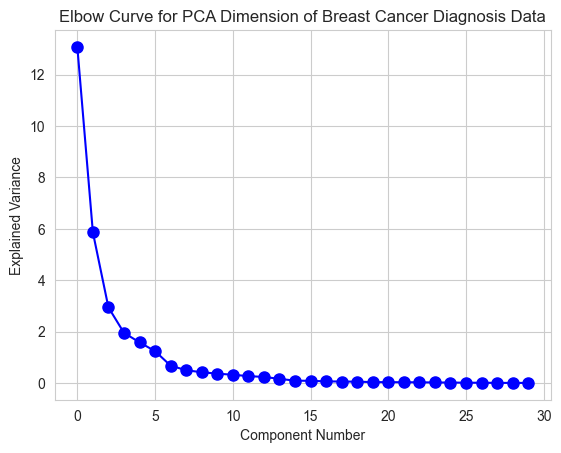

In [59]:
from sklearn.decomposition import PCA

# Instantiation of PCA
pca_var = PCA()

# Fitting PCA to training data
pca_var.fit(X_train_scaled)

# Visualizing explained variance with an increasing number of components
plt.plot(pca_var.explained_variance_, 'bo-', markersize=8)
plt.title("Elbow Curve for PCA Dimension of Breast Cancer Diagnosis Data")
plt.ylabel('Explained Variance')
plt.xlabel('Component Number')
sns.set_style("whitegrid")
plt.show()

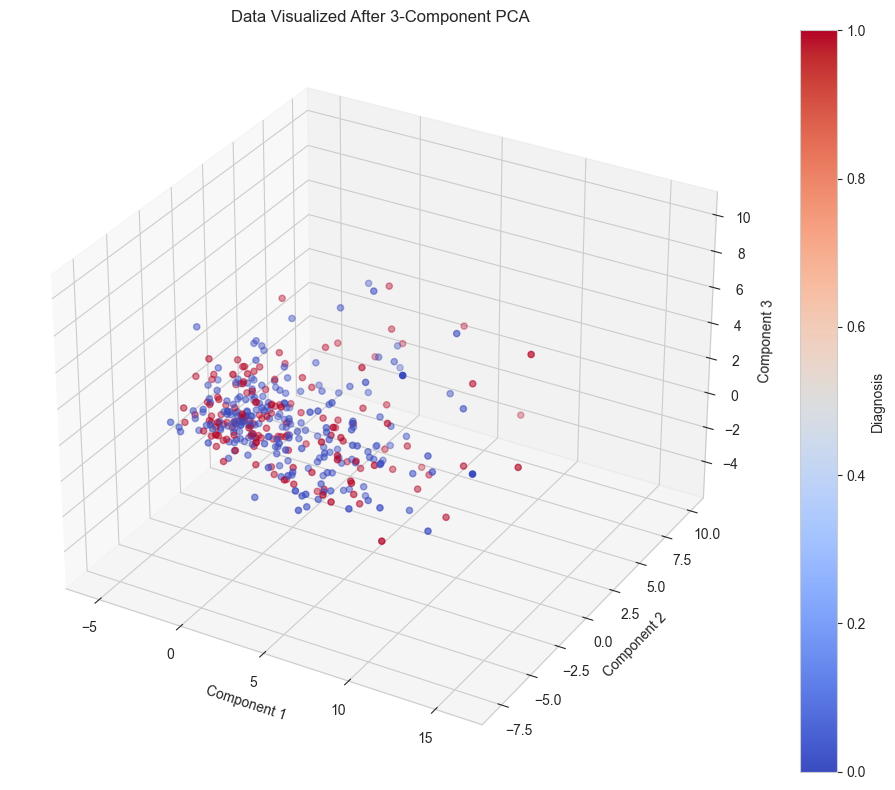

In [49]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from matplotlib import cm

# Instantiation of new PCA object
pca = PCA(n_components=3)

# Fit and transform training data with PCA using 3 components
pca.fit(X_train_scaled)
X_train_scaled_pca = pca.transform(X_train_scaled)

# Creating a dataframe of 3 PCA
pca_df = pd.DataFrame(X_train_scaled_pca, columns=['Component 1', 'Component 2', 'Component 3'])

# Appending diagnosis data into PCA dataframe
pca_df['Diagnosis'] = y_train

# Visualize PCA in a 3D plot (colour points by diagnosis to check for visual stratification)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_df['Component 1'], pca_df['Component 2'], pca_df['Component 3'], c=pca_df['Diagnosis'], cmap=cm.coolwarm)

# Labels
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.set_title('Data Visualized After 3-Component PCA')

# Adding colourbar aesthetics
colorbar = plt.colorbar(scatter)
colorbar.set_label('Diagnosis')

sns.set_style("whitegrid")
plt.tight_layout()
plt.show()


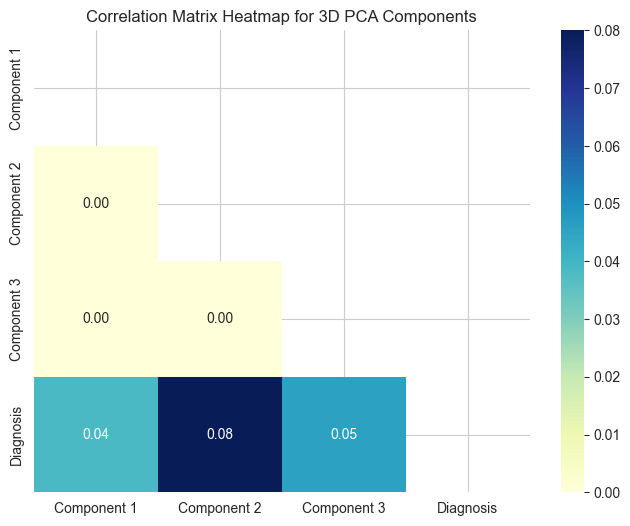

In [50]:
# Calculating the correlation matrix for X_train_scaled_pca
matrix_pca = pca_df.corr().abs()

# Creation of mask to hide the upper triangle of the matrix
mask_pca = np.triu(np.ones_like(matrix_pca, dtype=bool))

# Applying mask to the correlation matrix
reduced_matrix_pca = matrix_pca.mask(mask_pca)

#  heatmap for PCA
plt.figure(figsize=(8, 6))
heatmap_pca = sns.heatmap(reduced_matrix_pca, annot=True, cmap=plt.cm.YlGnBu, annot_kws={"fontsize": 10}, fmt=".2f")
plt.title("Correlation Matrix Heatmap for 3D PCA Components")
plt.show()


### Testing logistic regression performance using PCA and scikit-learn's pipeline method:

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split of the dataset into training and testing sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_train_scaled_pca, y_train, test_size=0.2, random_state=42)

# Created pipeline with PCA and Logistic Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Optionally scale features before PCA
    ('pca', PCA(n_components=3)),  # Use the number of components from PCA
    ('classifier', LogisticRegression(random_state=42))
])

# Fit the pipeline on the training data
pipeline.fit(X_train_pca, y_train_pca)

# Predictions on the test set
y_pred_pca = pipeline.predict(X_test_pca)

# Evaluation
accuracy = accuracy_score(y_test_pca, y_pred_pca)
classification_rep = classification_report(y_test_pca, y_pred_pca)
conf_matrix = confusion_matrix(y_test_pca, y_pred_pca)

#  results
print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:\n', classification_rep)
print('\nConfusion Matrix:\n', conf_matrix)


Accuracy: 0.93

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95        55
           1       0.94      0.89      0.91        36

    accuracy                           0.93        91
   macro avg       0.94      0.93      0.93        91
weighted avg       0.93      0.93      0.93        91


Confusion Matrix:
 [[53  2]
 [ 4 32]]


# Conclusion

* Breast cancer diagnosis can be predicted with roughly 98% accuracy using these 30 histological tumor characteristics as shown by the SVM parametric algorithm (98%) followed by Logistic Regression algorithm (97%) and the Genetic Algorithm (97%).

* Machine learning algorithms that performed the best were logistic regression (97%) and linear discriminant analysis (95%) out of the linear models using linear algorithms, and Random Forest (96%) and Decision Tree (95%) out of the classification models using ensemble algorithms. K-Nearest Neighbour, a non-parametric algorithm, was the least well perfroming (94%), although accuracy is at a good level.

* The mean accuracy for Logistic Regression after PCA is poorer than model accuracy without dimensional reduction.

* The most predictive features found with recursive feature elimination and cross validation using logistic regression as a classifier were: radius, texture, perimeter and area.

* The most predictive features using Random Forest classification were: area3, concave_points3 and  concave_points1.

* The most predictive features using Logistic Regression were: texture3, radius2, symmetry3, and concave_points1. Baring in mind that Logistic Regression assumes a linear relationship between the features and the log-odds of the outcome, so these interpretations are based on that assumption. If the dataset has non-linear relationships, more complex models might be considered.

* The most predictive features using SVM model were: concave_point1, texture3 and radius2.

* Based on the best chromosomes for the Genetic Algorithm, the top 3 selected features were: radius1, perimeter1 and area1, followed by; concavity1, symmetry1, perimeter2, area2, smoothness2, concavity2, concave_points2, fractal_dimension2, radius3, area3, smoothness3 and fractal_dimension3. This suggests that the selected features contribute significantly to the model's predictive performance.